In [1]:
import numpy as np
from sympy import Matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Data
student_ids = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
scores = np.array([93,83,69,62,75,93,73,77,65,65,78,90,94,78,57,76,56,78,84,92])

mean_score = np.mean(scores)
var_sample = np.var(scores, ddof=1)  # Sample variance (ddof=1)
var_population = np.var(scores, ddof=0)  # Population variance (ddof=0)
std_dev = np.std(scores, ddof=1)

print("1. Basic Stats:")
print(f"Mean: {mean_score:.2f}")
print(f"Sample Variance: {var_sample:.2f}")
print(f"Population Variance: {var_population:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")

print("\nComparison:")
print(f"Sample variance is slightly larger than population variance because sample variance divides by (n-1) instead of n, providing an unbiased estimator.")


1. Basic Stats:
Mean: 76.90
Sample Variance: 143.25
Population Variance: 136.09
Standard Deviation: 11.97

Comparison:
Sample variance is slightly larger than population variance because sample variance divides by (n-1) instead of n, providing an unbiased estimator.


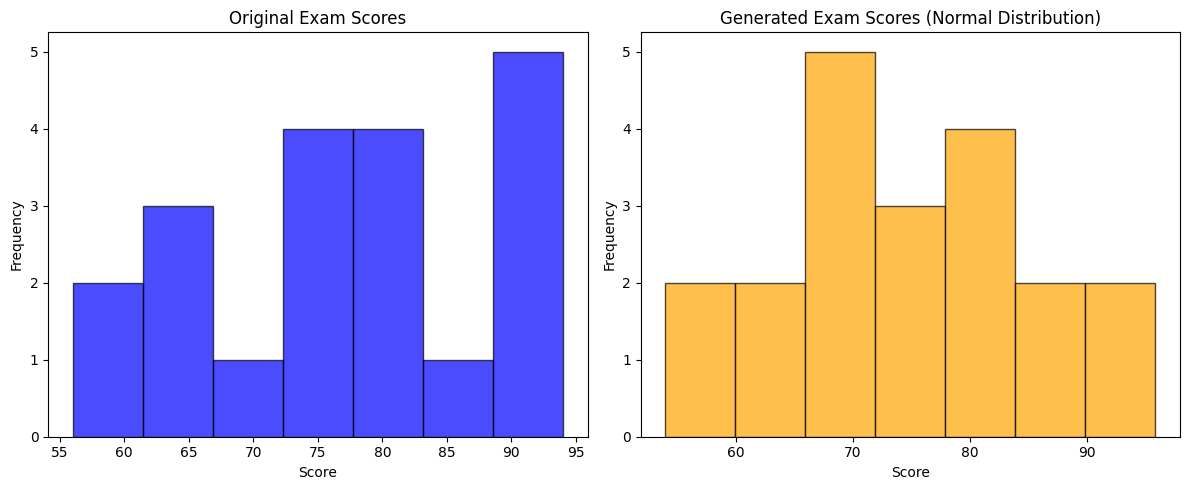

In [4]:
# 2. Random Number Generation
np.random.seed(42)
generated_data = np.random.normal(mean_score, std_dev, 20)

# Plotting histograms side by side
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(scores, bins=7, alpha=0.7, color='blue', edgecolor='black')
plt.title('Original Exam Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(generated_data, bins=7, alpha=0.7, color='orange', edgecolor='black')
plt.title('Generated Exam Scores (Normal Distribution)')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [5]:
# 3. Monte Carlo Simulation
# Estimate probability that a random student scores >= 75
simulated_scores = np.random.normal(mean_score, std_dev, 100000)
prob_ge_75 = np.mean(simulated_scores >= 75)

print(f"\n3. Monte Carlo Simulation:")
print(f"Estimated probability that a random student scores >= 75: {prob_ge_75:.4f}")



3. Monte Carlo Simulation:
Estimated probability that a random student scores >= 75: 0.5637



4. Hypothesis Testing:
Null Hypothesis: Mean score = 70
t-statistic = 2.5782
p-value = 0.0184
Reject the null hypothesis: The average exam score is significantly different from the hypothesized mean.


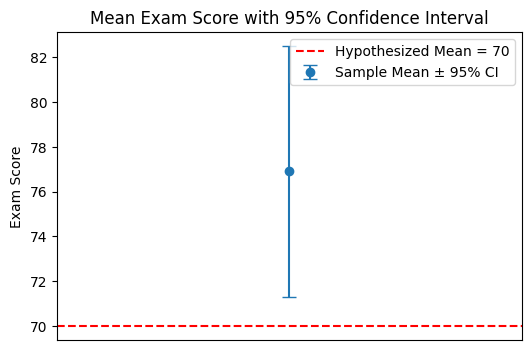

In [8]:
# 4. Hypothesis Testing
# Null hypothesis: Average exam score = (last 3 digits of ID % 50) + 50
# Since Student_ID max is 20, last 3 digits are just 20, so 20 % 50 + 50 = 70
hypothesized_mean = (20 % 50) + 50

# Import the stats module from scipy
from scipy import stats

# One-sample t-test
t_stat, p_value = stats.ttest_1samp(scores, hypothesized_mean)

print("\n4. Hypothesis Testing:")
print(f"Null Hypothesis: Mean score = {hypothesized_mean}")
print(f"t-statistic = {t_stat:.4f}")
print(f"p-value = {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    conclusion = "Reject the null hypothesis: The average exam score is significantly different from the hypothesized mean."
else:
    conclusion = "Fail to reject the null hypothesis: No significant evidence that the average exam score differs from the hypothesized mean."

print(conclusion)

# Visualization of mean with 95% confidence interval
conf_int = stats.t.interval(0.95, len(scores)-1, loc=mean_score, scale=std_dev/np.sqrt(len(scores)))

plt.figure(figsize=(6,4))
plt.errorbar(x=0, y=mean_score, yerr=[[mean_score - conf_int[0]], [conf_int[1] - mean_score]], fmt='o', capsize=5, label='Sample Mean ± 95% CI')
plt.axhline(hypothesized_mean, color='red', linestyle='--', label=f'Hypothesized Mean = {hypothesized_mean}')
plt.xticks([])
plt.ylabel('Exam Score')
plt.title('Mean Exam Score with 95% Confidence Interval')
plt.legend()
plt.show()